In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression #Modeli kurmamız için gerekli olan Lineer Regresyon yöntemi
from sklearn.metrics import mean_squared_error, mean_absolute_error #başarı değerlendirme metrikleri
from sklearn.model_selection import train_test_split, cross_val_score #model doğrulama yöntemleri
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



Bu veri seti, reklam harcamalarının satışlara olan etkisini incelemek amacıyla oluşturulmuş. Her bir gözlem, bir belirli bir reklam kanalında (TV, radyo, gazete) yapılan harcamaları ve bu harcamaların sonucunda elde edilen satışları içermektedir. İlgili sütunlar şu şekildedir:

TV: TV reklamlarına yapılan harcamaların milyonlarca dolar cinsinden miktarını temsil eder.
Radio: Radyo reklamlarına yapılan harcamaların milyonlarca dolar cinsinden miktarını temsil eder.
Newspaper: Gazete reklamlarına yapılan harcamaların milyonlarca dolar cinsinden miktarını temsil eder.
Sales: Elde edilen satış miktarını temsil eder.

In [19]:
data= pd.read_csv(r"C:\Users\bett0\Desktop\datasets\advertising.csv")
data.shape
data.head()
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [18]:
def outlier_thresholds(dataframe,col_name, q1 = 0.01, q3 = 0.99):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(data,["TV","radio","newspaper","sales"])

False

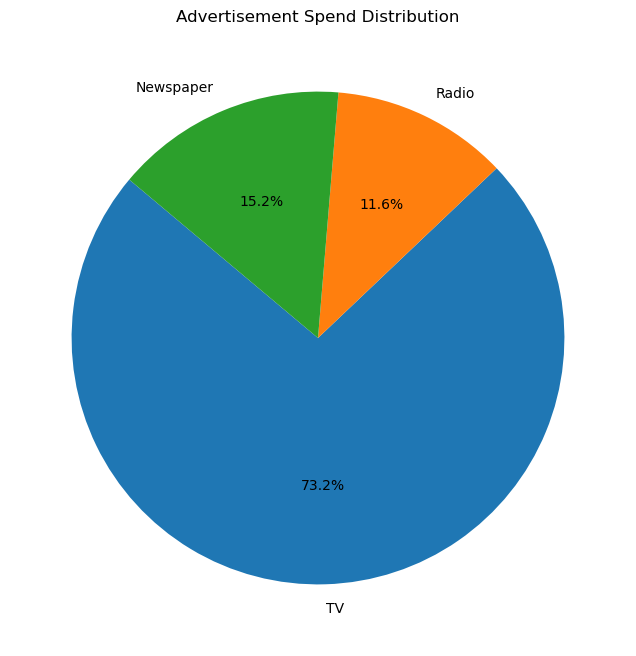

In [14]:
# Her bir reklam kanalına yapılan toplam harcamaları hesapla
total_tv = data['TV'].sum()
total_radio = data['radio'].sum()
total_newspaper = data['newspaper'].sum()

# Harcamaları bir liste olarak sakla
ad_spends = [total_tv, total_radio, total_newspaper]
ad_channels = ['TV', 'Radio', 'Newspaper']

# Pasta grafiği çiz
plt.figure(figsize=(8, 8))
plt.pie(ad_spends, labels=ad_channels, autopct='%1.1f%%', startangle=140)
plt.title('Advertisement Spend Distribution')
plt.show()

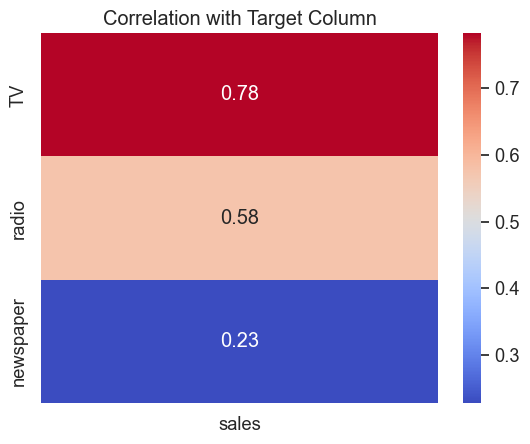

In [17]:
corr = data.corr()

target_corr = corr['sales'].drop('sales')

sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()


Bu noktada satışlar üzerine en çok etki eden değişkenlerin "TV" ve "radio" reklamları olduğunu gördük.

In [58]:
def compute_cost(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = X.T.dot(errors) / m
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Veri setinizi yükleyin
# data = pd.read_csv('veri_seti.csv')

# X ve y'i ayırın
X = data.drop("sales", axis=1).values
y = data["sales"].values





In [60]:

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Bias terimi ekle
X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

# Theta başlangıç değerleri
theta = np.zeros(X_train_b.shape[1])

# Parametreler
learning_rate = 0.01
iterations = 1000

# y_train'i düzelt
y_train = y_train.ravel()

# Gradient Descent
theta_final, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, iterations)

# Modelin performansını değerlendir
# Örneğin, X_test verileri üzerinde tahmin yapabilir ve gerçek y_test değerleri ile karşılaştırabilirsiniz.


In [61]:
# Eğitim setinde performans
y_pred_train = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled].dot(theta_final)
train_error = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Eğitim seti hatası:", train_error)

# Test setinde tahminler
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]
y_pred_test = X_test_b.dot(theta_final)
test_error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test seti hatası:", test_error)


Eğitim seti hatası: 1.6447304667880804
Test seti hatası: 1.781942249804248


In [62]:
# Eğitim setinde R2 skoru
r2_train = r2_score(y_train, y_pred_train)
print("Eğitim seti için R2 skoru:", r2_train)

# Test setinde R2 skoru
r2_test = r2_score(y_test, y_pred_test)
print("Test seti için R2 skoru:", r2_test)


Eğitim seti için R2 skoru: 0.895700484519507
Test seti için R2 skoru: 0.8993993457529713


In [55]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Eğitim setinde tahminler
y_pred_train = model.predict(X_train)

# Test setinde tahminler
y_pred_test = model.predict(X_test)

In [56]:
# Performans metriklerini hesaplayalım
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Sonuçları yazdıralım
print(f"Eğitim Seti RMSE: {train_rmse}")
print(f"Test Seti RMSE: {test_rmse}")
print(f"Eğitim Seti R^2: {train_r2}")
print(f"Test Seti R^2: {test_r2}")

Eğitim Seti RMSE: 1.6447277656443373
Test Seti RMSE: 1.78159966153345
Eğitim Seti R^2: 0.8957008271017817
Test Seti R^2: 0.899438024100912
